In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# READING THE DATASET

In [5]:
data=pd.read_csv(r'C:\Users\Administrator\Downloads\mushrooms.csv')

In [6]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [52]:
data.shape

(8124, 23)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# DATA PREPROCESSING

In [18]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [21]:
data.groupby(['class'])['class'].count()

class
e    4208
p    3916
Name: class, dtype: int64

In [22]:
X=data.drop(['class'],axis=1)
y=data['class']

In [31]:
X=pd.get_dummies(X)

In [32]:
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


CORRELATION MATRIX

<AxesSubplot:>

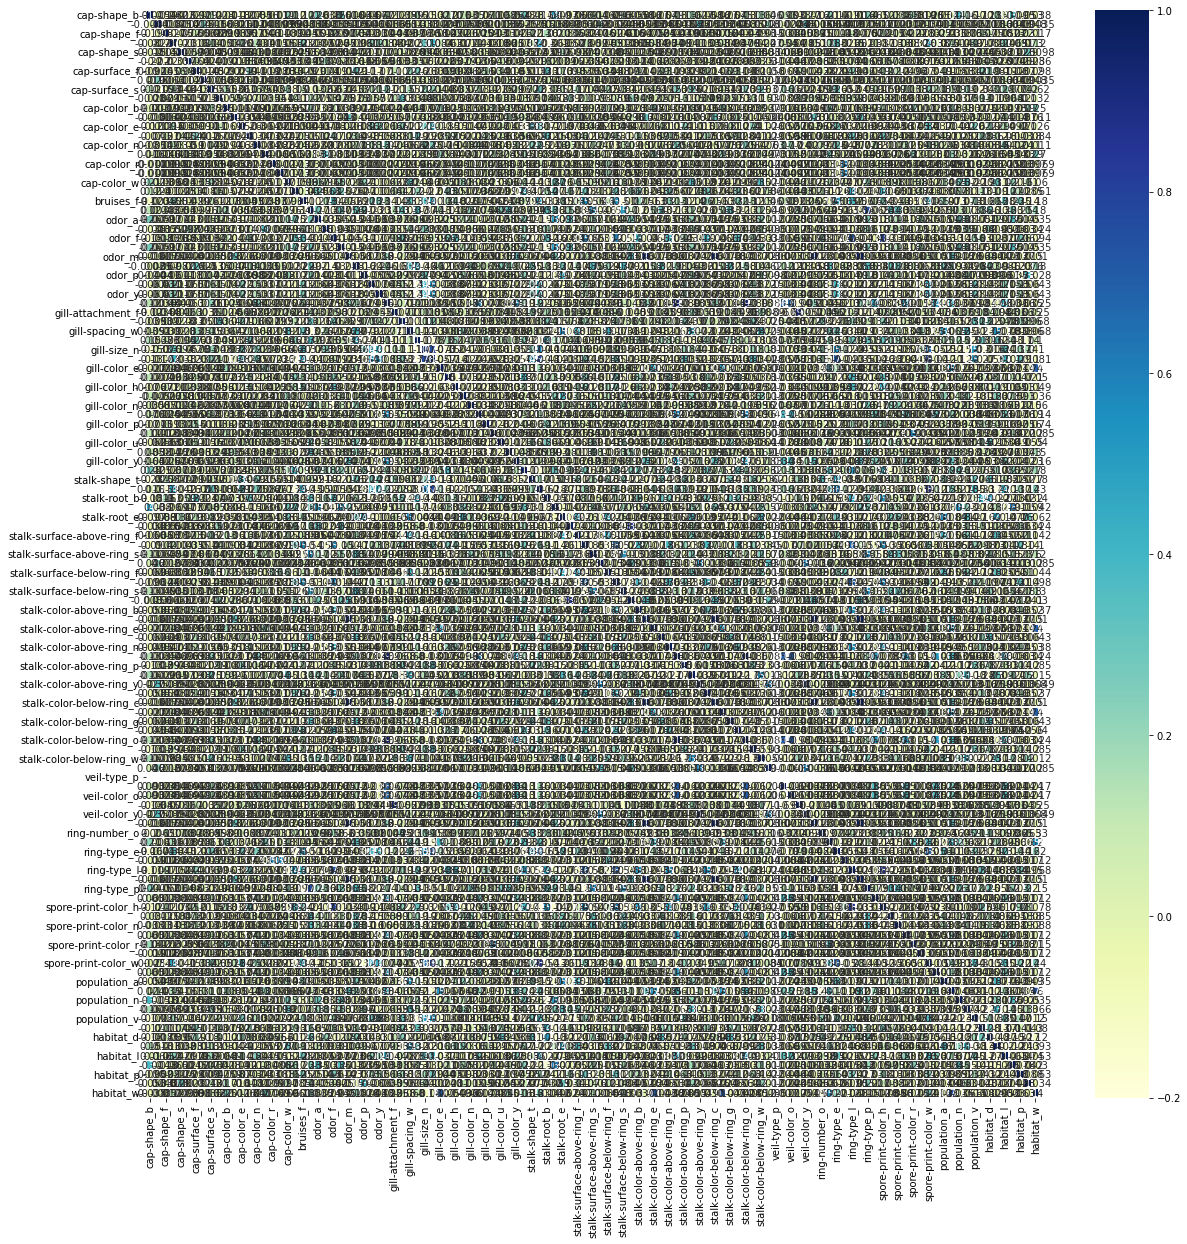

In [35]:
cor=X.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(cor,vmin=-.2,vmax=1,annot=True,linewidth=0.2,cmap='YlGnBu')

# NAIVE-BAYES CLASSIFIER

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.25)

FITTING GUASSIAN NAIVE BAYES TO THE TRAINING SET

In [41]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [42]:
y_pred=classifier.predict(X_test)

In [43]:
y_pred

array(['e', 'p', 'p', ..., 'e', 'e', 'p'], dtype='<U1')

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.9601181683899557

In [46]:
cm

array([[959,  81],
       [  0, 991]], dtype=int64)

FITTING BERNOULI  NAIVE BAYES TO THE TRAINING SET

In [47]:
from sklearn.naive_bayes import BernoulliNB
classifier=BernoulliNB()
classifier.fit(X_train,y_train)

BernoulliNB()

In [48]:
y_pred=classifier.predict(X_test)

In [49]:
y_pred

array(['e', 'p', 'p', ..., 'e', 'e', 'p'], dtype='<U1')

In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.9369768586903003

In [51]:
cm

array([[1024,   16],
       [ 112,  879]], dtype=int64)